
#**Importing Main Librairies**


In [1]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import os
import splitfolders
from prettytable import PrettyTable

# **Split Data into Train & Test**

In [28]:
#split data into train 70% validation 15% test 15%
splitfolders.ratio('/content/drive/MyDrive/chest_xray 3 classes split (all)/', output="/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/", seed=1337, ratio=(0.85, 0.075,0.075)) 

Copying files: 5856 files [01:49, 53.58 files/s]


In [29]:
print(len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/test/')))

3


In [64]:
# statestics after spliting the dataset
# stats train
num_train_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/train/Normal'))
num_train_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/train/Bacterial'))
num_train_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/train/Viral'))
TOT_train = num_train_normal + num_train_bacterial + num_train_viral
# stats test
num_test_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/test/Normal'))
num_test_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/test/Bacterial'))
num_test_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/test/Viral'))
TOT_test = num_test_viral + num_test_bacterial + num_test_normal
# stats valdidation
num_valid_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/val/Normal'))
num_valid_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/val/Bacterial'))
num_valid_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/val/Viral'))
TOT_valid = num_valid_normal + num_valid_bacterial + num_valid_viral

TOT_normal =  num_valid_normal + num_test_normal + num_train_normal
TOT_viral = num_valid_viral + num_test_viral + num_train_viral
TOT_bacterial = num_train_bacterial + num_test_bacterial + num_valid_bacterial
TOT_all = TOT_normal + TOT_viral +TOT_bacterial

#table stat general
t = PrettyTable(['Class','Train','Validation', 'Test','Total'])
t.add_row(['Normal',num_train_normal,num_valid_normal,num_test_normal,TOT_normal])
t.add_row(['viral',num_train_viral,num_valid_viral,num_test_viral,TOT_viral])
t.add_row(['Bacterial',num_train_bacterial,num_valid_bacterial,num_test_bacterial,TOT_bacterial])
t.add_row(['Total',TOT_train,TOT_valid,TOT_test,TOT_all])
print(t)

+-----------+-------+------------+------+-------+
|   Class   | Train | Validation | Test | Total |
+-----------+-------+------------+------+-------+
|   Normal  |  1345 |    118     | 120  |  1583 |
|   viral   |  1269 |    111     | 113  |  1493 |
| Bacterial |  2363 |    208     | 209  |  2780 |
|   Total   |  4977 |    437     | 442  |  5856 |
+-----------+-------+------------+------+-------+


# **Creat Augmented data Viral**

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [33]:
mainDIR = os.listdir('/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)')
print(mainDIR)

['train', 'val', 'test']


In [34]:
train_folder= '/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/train'
val_folder = '/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/val'
test_folder = '/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/test'

In [35]:
# train 
train_n = train_folder+'/Normal/'
train_b = train_folder+'/Bacterial/'
train_v = train_folder+'/Viral/'
print(len(os.listdir(train_n)))

1345


In [36]:
#get the minimum size
h_min = 100000
w_min = 100000
for img in os.listdir(train_v):
   x,y,z = (cv2.imread(train_v+img)).shape
   if x < h_min :
     h_min = x
   if y < w_min :
     w_min = y
print("H-min "+str(h_min))
print("W-min "+str(w_min))

H-min 127
W-min 384


In [37]:
#data augmentation [close the gap] between Normal and pneumnia (we work only on train)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    shear_range = 20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)
#generate augmented data
normal_train_generator = datagen.flow_from_directory(train_folder,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 classes=['Viral']  
                                                 )

Found 1269 images belonging to 1 classes.


In [38]:
generated_x = np.concatenate([normal_train_generator.next()[0] for i in range(normal_train_generator.__len__())])
generated_y = np.concatenate([normal_train_generator.next()[1] for i in range(normal_train_generator.__len__())])

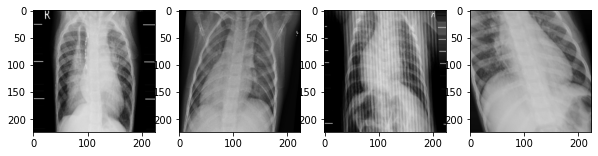

In [39]:
#plot
fig = plt.figure(figsize=(10, 10))
columns = 4 
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(generated_x[i+300]/255)
plt.show()

In [42]:
for i in range(len(generated_x)):
# save images
  cv2.imwrite('/content/drive/MyDrive/Augmented Viral .85 .075 .075/'+str(i)+'.jpeg', generated_x[i])

In [58]:
print(len(os.listdir('/content/drive/MyDrive/Augmented Viral .85 .075 .075/')))

1269


In [44]:
import shutil
# duplicate the dataset 
source_dir = "/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)"
destination_dir = "/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)"
shutil.copytree(source_dir, destination_dir)

'/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)'

In [77]:
from prettytable import PrettyTable
# statestics after spliting the dataset and adding noise
# stats train
num_train_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/train/Normal'))
num_train_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/train/Bacterial'))
num_train_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/train/Viral'))
TOT_train = num_train_normal + num_train_bacterial + num_train_viral
# stats test
num_test_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/test/Normal'))
num_test_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/test/Bacterial'))
num_test_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/test/Viral'))
TOT_test = num_test_viral + num_test_bacterial + num_test_normal
# stats valdidation
num_valid_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/val/Normal'))
num_valid_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/val/Bacterial'))
num_valid_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/val/Viral'))
TOT_valid = num_valid_normal + num_valid_bacterial + num_valid_viral

TOT_normal =  num_valid_normal + num_test_normal + num_train_normal
TOT_viral = num_valid_viral + num_test_viral + num_train_viral
TOT_bacterial = num_train_bacterial + num_test_bacterial + num_valid_bacterial
TOT_all = TOT_normal + TOT_viral +TOT_bacterial

#table stat general
t = PrettyTable(['Class','Train','Validation', 'Test','Total'])
t.add_row(['Normal',num_train_normal,num_valid_normal,num_test_normal,TOT_normal])
t.add_row(['viral',num_train_viral,num_valid_viral,num_test_viral,TOT_viral])
t.add_row(['Bacterial',num_train_bacterial,num_valid_bacterial,num_test_bacterial,TOT_bacterial])
t.add_row(['Total',TOT_train,TOT_valid,TOT_test,TOT_all])
print(t)

+-----------+-------+------------+------+-------+
|   Class   | Train | Validation | Test | Total |
+-----------+-------+------------+------+-------+
|   Normal  |  1345 |    118     | 120  |  1583 |
|   viral   |  2538 |    111     | 113  |  2762 |
| Bacterial |  2363 |    208     | 209  |  2780 |
|   Total   |  6246 |    437     | 442  |  7125 |
+-----------+-------+------------+------+-------+


In [59]:
#Viral
#copy aug images to their respective folder (Train only)
source_folder = "/content/drive/MyDrive/Augmented Viral .85 .075 .075/"
destination_folder = "/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/train/Viral/"
cpt = 0
# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        cpt+=1
        shutil.copy(source, destination)
print(cpt)  

1269


In [74]:
#copy missing images to their respective folder (Train only)
source_folder = "/content/drive/MyDrive/chest_xray 3c (splited .85 .075 .075)/train/Bacterial/"
destination_folder = "/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/train/Bacterial/"
cpt = 0
# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if file_name not in os.listdir(destination_folder) :
        cpt+=1
        shutil.copy(source, destination)
print(cpt)  

13


In [82]:
from prettytable import PrettyTable
# statestics after spliting the dataset and adding noise
# stats train
num_train_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/train/Normal'))
num_train_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/train/Bacterial'))
num_train_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/train/Viral'))
TOT_train = num_train_normal + num_train_bacterial + num_train_viral
# stats test
num_test_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/test/Normal'))
num_test_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/test/Bacterial'))
num_test_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/test/Viral'))
TOT_test = num_test_viral + num_test_bacterial + num_test_normal
# stats valdidation
num_valid_normal = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/val/Normal'))
num_valid_bacterial = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/val/Bacterial'))
num_valid_viral = len(os.listdir('/content/drive/MyDrive/chest_xray 3c [AUG] (splited .85 .075 .075)/val/Viral'))
TOT_valid = num_valid_normal + num_valid_bacterial + num_valid_viral

TOT_normal =  num_valid_normal + num_test_normal + num_train_normal
TOT_viral = num_valid_viral + num_test_viral + num_train_viral
TOT_bacterial = num_train_bacterial + num_test_bacterial + num_valid_bacterial
TOT_all = TOT_normal + TOT_viral +TOT_bacterial

#table stat general
t = PrettyTable(['Class','Train','Validation', 'Test','Total'])
t.add_row(['Normal',num_train_normal,num_valid_normal,num_test_normal,TOT_normal])
t.add_row(['viral',num_train_viral,num_valid_viral,num_test_viral,TOT_viral])
t.add_row(['Bacterial',num_train_bacterial,num_valid_bacterial,num_test_bacterial,TOT_bacterial])
t.add_row(['Total',TOT_train,TOT_valid,TOT_test,TOT_all])
print(t)

+-----------+-------+------------+------+-------+
|   Class   | Train | Validation | Test | Total |
+-----------+-------+------------+------+-------+
|   Normal  |  1345 |    118     | 120  |  1583 |
|   viral   |  2538 |    111     | 113  |  2762 |
| Bacterial |  2363 |    208     | 209  |  2780 |
|   Total   |  6246 |    437     | 442  |  7125 |
+-----------+-------+------------+------+-------+
